In [1]:
import pandas as pd

# Get env vars from local.env
host = %env DB_HOSTNAME
user = %env DB_USERNAME
password = %env DB_PASSWORD
db = %env DB_NAME

# Connection URL to our local MySQL DB
conn = f'mysql+mysqldb://{user}:{password}@{host}/{db}'

In [2]:
pd.read_sql("SHOW tables", conn)

,Tables_in_suyc
0,boundaries
1,census_boundaries
2,provider_statistics
3,schema_migrations
4,service_providers
5,stats_caches
6,submissions
7,zip_boundaries


In [3]:
pd.read_sql("SELECT count(id) FROM submissions;", conn)

,count(id)
0,6258512


In [4]:
query = "SELECT test_date, count(id) as submissions FROM submissions GROUP BY test_date ORDER BY test_date DESC"
submissions_by_date = pd.read_sql(query, conn)

submissions_by_date['test_date'] = pd.to_datetime(submissions_by_date['test_date'])
submissions_by_date.set_index('test_date', inplace=True)

In [5]:
submissions_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 438 entries, 2019-08-27 to 2018-06-03
Data columns (total 1 columns):
submissions    438 non-null int64
dtypes: int64(1)
memory usage: 6.8 KB


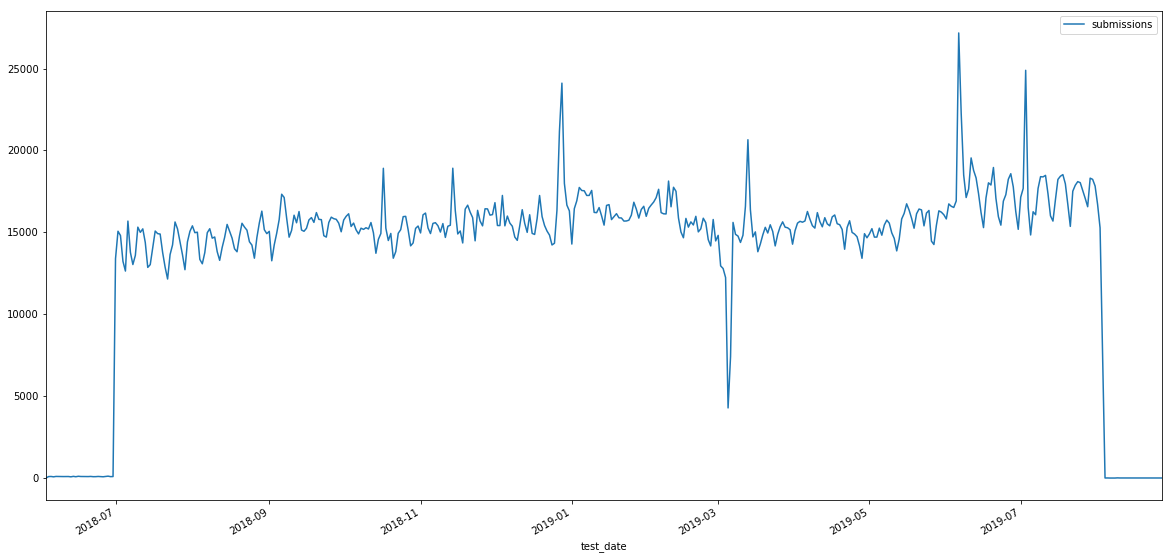

In [7]:
submissions_by_date.plot(figsize=(20,10))